## Mosquito vs Beer 


 Modeling the probability of drinking beer on Mosquito bites. Utilized null hypothesis, t-tests, and p-value.

Using the dataset of the results of the Mosquito vs Beer experiment, codes are written to create box plots for the number of mosquito bites in each group. 

Basic statistics measures for each group is calculated. Data simulation is implemented to calculate the experiment outcome assuming no association is between beer consumption and mosquito bites. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('mosquitos_data.csv')
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
Response     43 non-null int64
Treatment    43 non-null object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


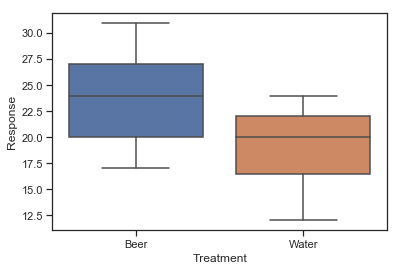

In [3]:
sns.set(style="ticks")
sns.boxplot(x="Treatment", y="Response", data=df)
plt.title=("Response Based")
plt.show()


The illustrated boxplot, presents the number of mosquitos biting individuals who consumed Beer vs Water as the treatment.

In [4]:
df_grouped=df.groupby('Treatment')
print('The range of numbers of mosquito bites for Beer treatment is: "{0} to {1}" \nThe range of numbers of mosquito bites for Water treatment is: "{2} to {3}"'.format(df_grouped.min().loc['Beer','Response'], df_grouped.max().loc['Beer','Response'], df_grouped.min().loc['Water','Response'], df_grouped.max().loc['Water','Response']))

The range of numbers of mosquito bites for Beer treatment is: "17 to 31" 
The range of numbers of mosquito bites for Water treatment is: "12 to 24"


We can also look into the median value in this plot. The median value for mosquito bites under Beer treatment is in in the higher quartile of water treatment, while the median value for Water treatment corresponds to the lower quartile of the Beer treatment.

In [5]:
print('The median of mosquito bites with Beer treatment is: {0}, while for Water treatment is: {1}'.format(df_grouped.median().loc['Beer','Response'], df_grouped.median().loc['Water','Response']))

print('\nThe average of mosquito bites between Beer and Water treatment is: {}'.format(df_grouped.mean().loc['Beer', 'Response']-df_grouped.mean().loc['Water', 'Response']))


The median of mosquito bites with Beer treatment is: 24, while for Water treatment is: 20

The average of mosquito bites between Beer and Water treatment is: 4.37777777777778


These all rise the question that the Beer treatment has impact on the number of mosquito bites. However, to find out whether the difference between the median and mean of the mentioned values are significant or not, needs further investigations.

In [6]:
print('\nThe mean value for mosquito bites with Beer treatment is: {}'.format(df_grouped.mean().loc['Beer', 'Response']))
print ('\nThe mean value for mosquito bites with Water treatment is: {}'.format(df_grouped.mean().loc['Water', 'Response']))

experiment_mean_diff = df_grouped.mean().loc['Beer', 'Response']-df_grouped.mean().loc['Water', 'Response']
print ('\nThis shows that the mean (average) of number of mosquito bites with Beer treatment is higher than water treatment by {}.'.format(experiment_mean_diff))



The mean value for mosquito bites with Beer treatment is: 23.6

The mean value for mosquito bites with Water treatment is: 19.22222222222222

This shows that the mean (average) of number of mosquito bites with Beer treatment is higher than water treatment by 4.37777777777778.


In [7]:
df_grouped.mean()

,Response
Treatment,
Beer,23.600000
Water,19.222222


The median value for mosquito bites with Beer treatment is 24 and the median value for mosquito bites with Water treatment is 20. This demonsrates that the middle number of mosquito bites is higher in Beer treatments by 4.

In [8]:
df_grouped.median()

,Response
Treatment,
Beer,24
Water,20


In [9]:
df_grouped.std()

,Response
Treatment,
Beer,4.133199
Water,3.671120


The higher the standard deviation, the more distance the number of mosquito bites are from the mean value. In this experiment the number of mosquito bites with beer treatment are more distanced from their mean than the number of bites with water treatment.

(array([  2.,   4.,  16.,  34.,  70.,  88., 160., 229., 254., 289., 202.,
        227., 159., 135.,  51.,  47.,  23.,   6.,   2.,   1.]),
 array([-4.41333333, -3.95466667, -3.496     , -3.03733333, -2.57866667,
        -2.12      , -1.66133333, -1.20266667, -0.744     , -0.28533333,
         0.17333333,  0.632     ,  1.09066667,  1.54933333,  2.008     ,
         2.46666667,  2.92533333,  3.384     ,  3.84266667,  4.30133333,
         4.76      ]),
 <a list of 20 Patch objects>)

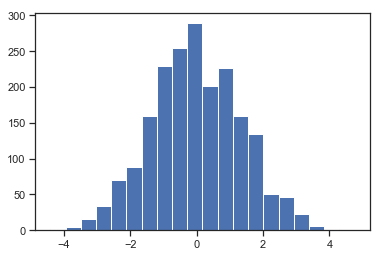

In [12]:
import random
df['Treatment']='Beer'
list_index=[]
difference=[]
index=0
for iteration in range(1,5000):
    for i in range(0,18):
        index=random.randint(0,42)
        while index in list_index:
            index=random.randint(0,42)
        df.loc[index, 'Treatment']='Water'  # Shuffling Treatment
        list_index.append(index)
    df_grouped=df.groupby('Treatment')
    df_grouped.mean()
    difference.append(df_grouped.mean().loc['Beer', 'Response']-df_grouped.mean().loc['Water', 'Response'])
    df['Treatment']='Beer'
    list_index=[]
minimum= min(difference)
maximum = max(difference)
plt.hist(difference, bins=20)

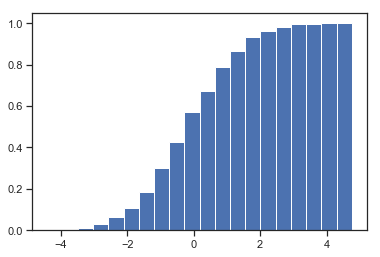

In [13]:
# Calculating of obtaining the experiment outcome assuming no association between beer consumption
# Generating the Cumulative Distribution Function to measure the probabilities of different occurances
counts, bins, bars = plt.hist(difference, bins=20, density=True, cumulative=True)

In [14]:
# Calculating the Probability of obtaining the experiment outcome assuming no association between beer consumption and mosquito bites
import numpy as np
#Finding the edge of the bin that is greater than the experiment's difference in the mean
a= np.where(bins < experiment_mean_diff )
b=int(a[0][-1])
print('The bins edge is at: ', b)

print('The probability of obtaining the experiemnt outcome assuming no association with beer consumption is: \n', (1 - counts[b - 1]))

The bins edge is at:  19
The probability of obtaining the experiemnt outcome assuming no association with beer consumption is: 
 0.0005002501250624958


#### The probability of obtaining the experiemnt outcome assuming no association exists between beer consumption and the mosquito bites, is 0.00050025. 

#### This means the p-value is 0.00050025 which is less than 0.05 and therefore statistically significant to reject the null hypothesis. 